In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('heart.csv')

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ECG report,FH,FD,alcohol,smoking,MT,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,1,1,1,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1,1,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1,1,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0,0,0,0,0
2117,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,0,0,0
2118,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0,0,0,0,0,0
2119,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,0,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         2121 non-null   int64  
 1   sex         2121 non-null   int64  
 2   cp          2121 non-null   int64  
 3   trestbps    2121 non-null   int64  
 4   chol        2121 non-null   int64  
 5   fbs         2121 non-null   int64  
 6   restecg     2121 non-null   int64  
 7   thalach     2121 non-null   int64  
 8   exang       2121 non-null   int64  
 9   oldpeak     2121 non-null   float64
 10  slope       2121 non-null   int64  
 11  ca          2121 non-null   int64  
 12  thal        2121 non-null   int64  
 13  ECG report  2121 non-null   int64  
 14  FH          2121 non-null   int64  
 15  FD          2121 non-null   int64  
 16  alcohol     2121 non-null   int64  
 17  smoking     2121 non-null   int64  
 18  MT          2121 non-null   int64  
 19  target      2121 non-null  

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ECG report,FH,FD,alcohol,smoking,MT,target
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.544554,0.544554,0.544554,0.544554,0.544554,0.544554
std,9.069240,0.465351,1.030591,17.513307,51.757354,0.355693,0.525115,22.872725,0.469129,1.159431,0.615354,1.021158,0.611409,0.498128,0.498128,0.498128,0.498128,0.498128,0.498128,0.498128
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'ECG report', 'FH', 'FD',
       'alcohol', 'smoking ', 'MT', 'target'],
      dtype='object')

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ECG report,FH,FD,alcohol,smoking,MT,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,1,1,1,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1,1,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1,1,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0,0,0,0,0
2117,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,0,0,0
2118,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0,0,0,0,0,0
2119,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,0,0,0,0,0


In [22]:
df.size

42420

In [23]:
df.shape

(2121, 20)

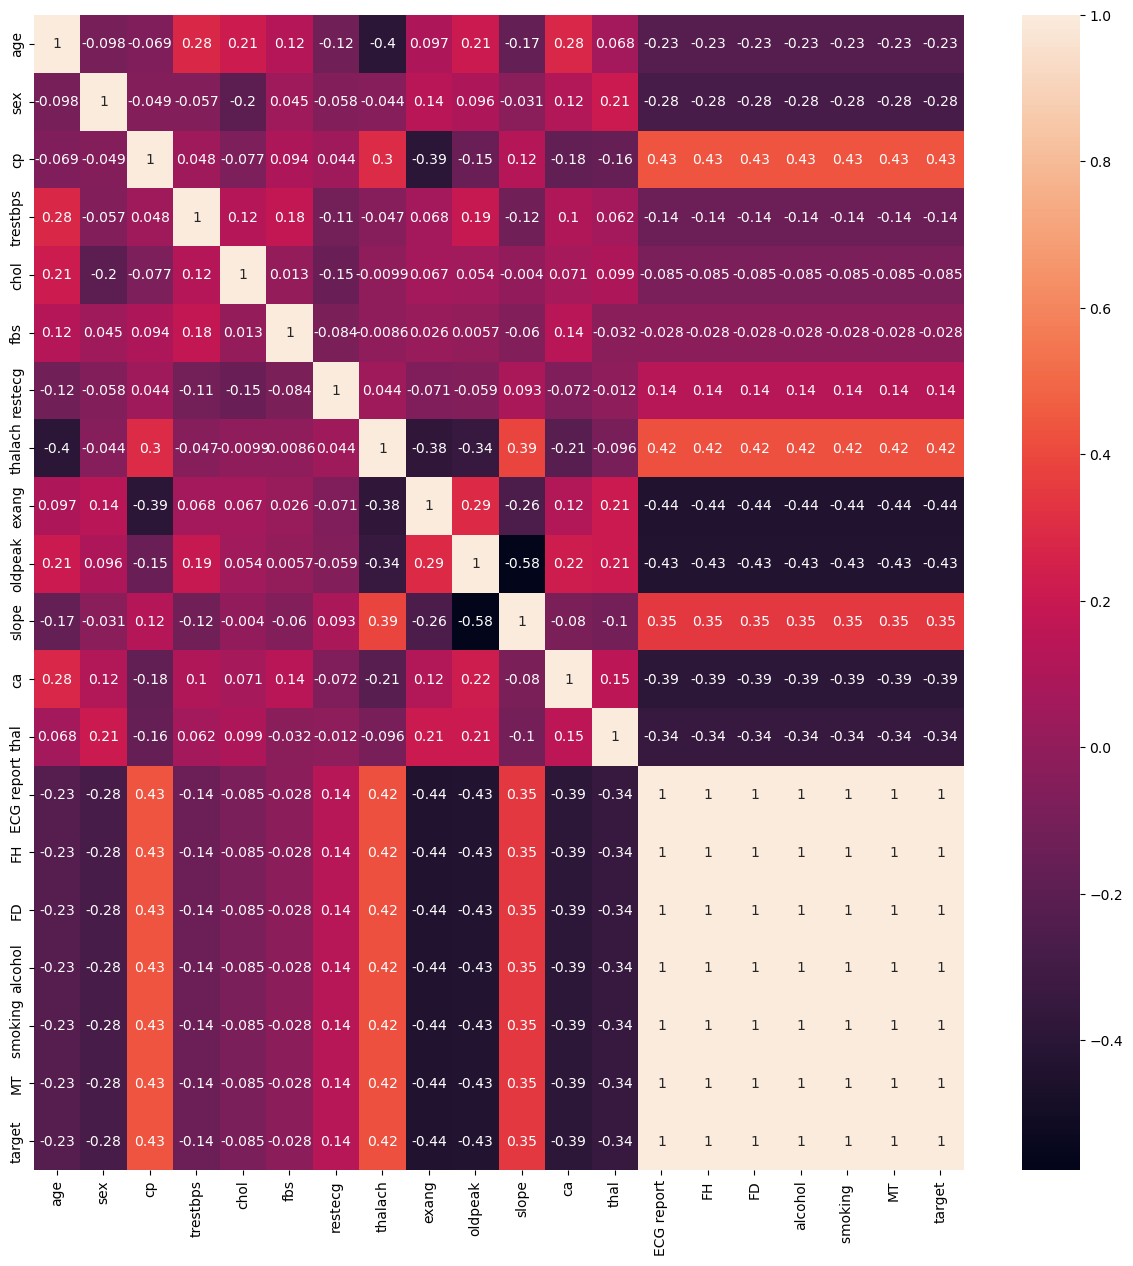

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: >

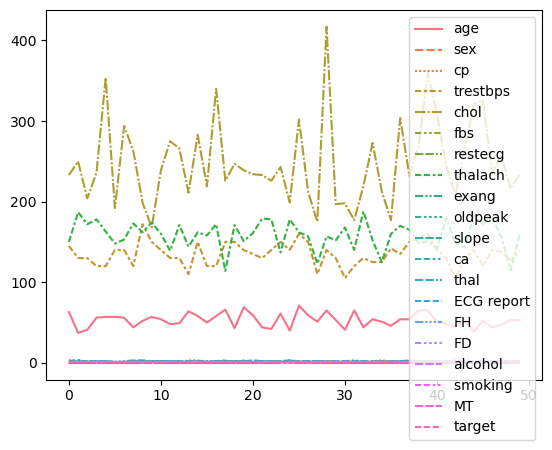

In [25]:
sns.lineplot(data=df.head(50))

In [26]:
X = df.drop(['target'], axis=1)
Y = df['target']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1696, 19) (425, 19) (1696,) (425,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
# Make predictions
y_pred = KNN.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
acc=KNN.score(X_train, Y_train)
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9988207547169812
Precision: 1.0
Recall: 0.9788135593220338
F1 Score: 0.9892933618843683


In [32]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Perceptron classifier
perceptron = Perceptron()

# Train the classifier
perceptron.fit(X_train, Y_train)

# Make predictions
y_pred_perceptron = perceptron.predict(X_test)

# Calculate precision, recall, and F1 score
precision_perceptron = precision_score(Y_test, y_pred_perceptron)
recall_perceptron = recall_score(Y_test, y_pred_perceptron)
f1_perceptron = f1_score(Y_test, y_pred_perceptron)
acc_perceptron = accuracy_score(Y_test, y_pred_perceptron)

# Print the results
print("Perceptron Accuracy:", acc_perceptron)
print("Perceptron Precision:", precision_perceptron)
print("Perceptron Recall:", recall_perceptron)
print("Perceptron F1 Score:", f1_perceptron)


Perceptron Accuracy: 0.9835294117647059
Perceptron Precision: 1.0
Perceptron Recall: 0.9703389830508474
Perceptron F1 Score: 0.9849462365591398


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an SVC classifier
svc = SVC()

# Train the classifier
svc.fit(X_train, Y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)

# Calculate precision, recall, and F1 score
precision_svc = precision_score(Y_test, y_pred_svc)
recall_svc = recall_score(Y_test, y_pred_svc)
f1_svc = f1_score(Y_test, y_pred_svc)
acc_svc = accuracy_score(Y_test, y_pred_svc)

# Print the results
print("SVC Accuracy:", acc_svc)
print("SVC Precision:", precision_svc)
print("SVC Recall:", recall_svc)
print("SVC F1 Score:", f1_svc)

SVC Accuracy: 0.7341176470588235
SVC Precision: 0.7303370786516854
SVC Recall: 0.826271186440678
SVC F1 Score: 0.775347912524851


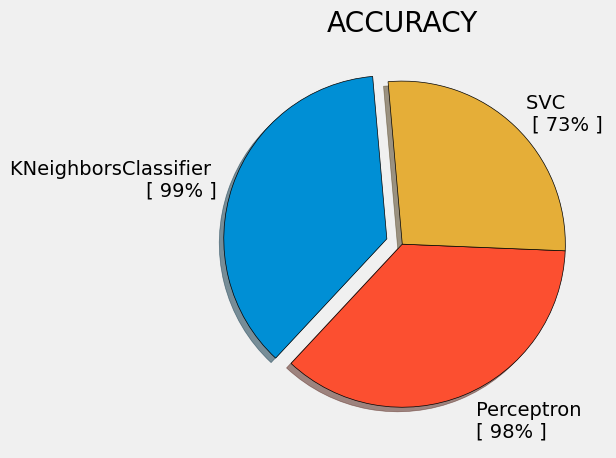

In [41]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Language Popularity
#python is not good with a lot of data so we shall modify our list to top 5 languages.
slices = [99, 98, 73]
labels = ['KNeighborsClassifier \n [ 99% ]', '\n Perceptron \n [ 98% ]', 'SVC \n [ 73% ]']
explode = [0.1,0,0] #this puts an emphasis on python

plt.pie(slices, labels = labels, explode = explode, 
        #shadow = True for asthetics to add a shadow to our plot
        shadow = True,
        #startangle = 90, rotates the original chart by 90 degress
        startangle = 95,
        wedgeprops = {'edgecolor': 'black'})

#wedgeprops is to put a boundary where the two colors meet.
#more on the matplotlib wedge documentation for more customisations.

plt.title('ACCURACY')
plt.tight_layout()
plt.show()

In [34]:
prediction= KNN.predict(np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,1,1,1]]))

In [35]:
prediction[0].round()

1

In [36]:
prediction= KNN.predict(np.array([[57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0,0,0,0]]))

In [37]:
prediction[0].round()

0

In [38]:
prediction= KNN.predict(np.array([[57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,0,0,0,0,0]]))

In [39]:
prediction[0].round()

0

In [40]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
KNN_pkl_filename = 'KNN.pkl'
# Open the file to save as pkl file
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(KNN, KNN_Model_pkl)
# Close the pickle instances
KNN_Model_pkl.close()